In [26]:
import warnings
warnings.filterwarnings('ignore')

# import the neccessary modules
import pandas as pd
import numpy as np
# importing pyplot for displaying the dataset
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# reading the dataset
df = pd.read_csv("https://canvas.wlv.ac.uk/courses/41905/files/6902595/download?download_frd=1&verifier=XVh1Te1okB5mOIJ61WfxbE8p5Gnz2TydrBmuNqII")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [31]:
# getting sum of empty rows in dataset

print(df.isna().sum())

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [32]:
# checking for duplicate on the dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
162    False
163    False
164    False
165    False
166    False
Length: 167, dtype: bool

In [33]:
# getting the info of the dataset
print(df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [34]:
# getting final description of the data
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [35]:
df.shape

(167, 10)

In [36]:
# # Visualize the correlation your data and identify variables for further analysis
# g = sns.PairGrid(df)
# g.map(sns.scatterplot);

In [37]:
# declaring the features and the target
X = df


# Extract the 'country' column for labeling later
y_names = df['country']

In [38]:
# Drop the 'country' column for clustering
X = df.drop(['country'], axis=1)

In [39]:
X

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


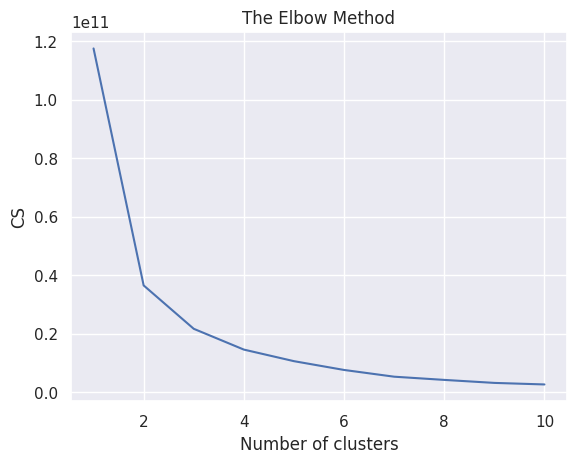

In [40]:
# using elbow method to find the best number of clusters
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [41]:
# training the model

kmeans = KMeans(n_clusters=2, random_state=0)
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

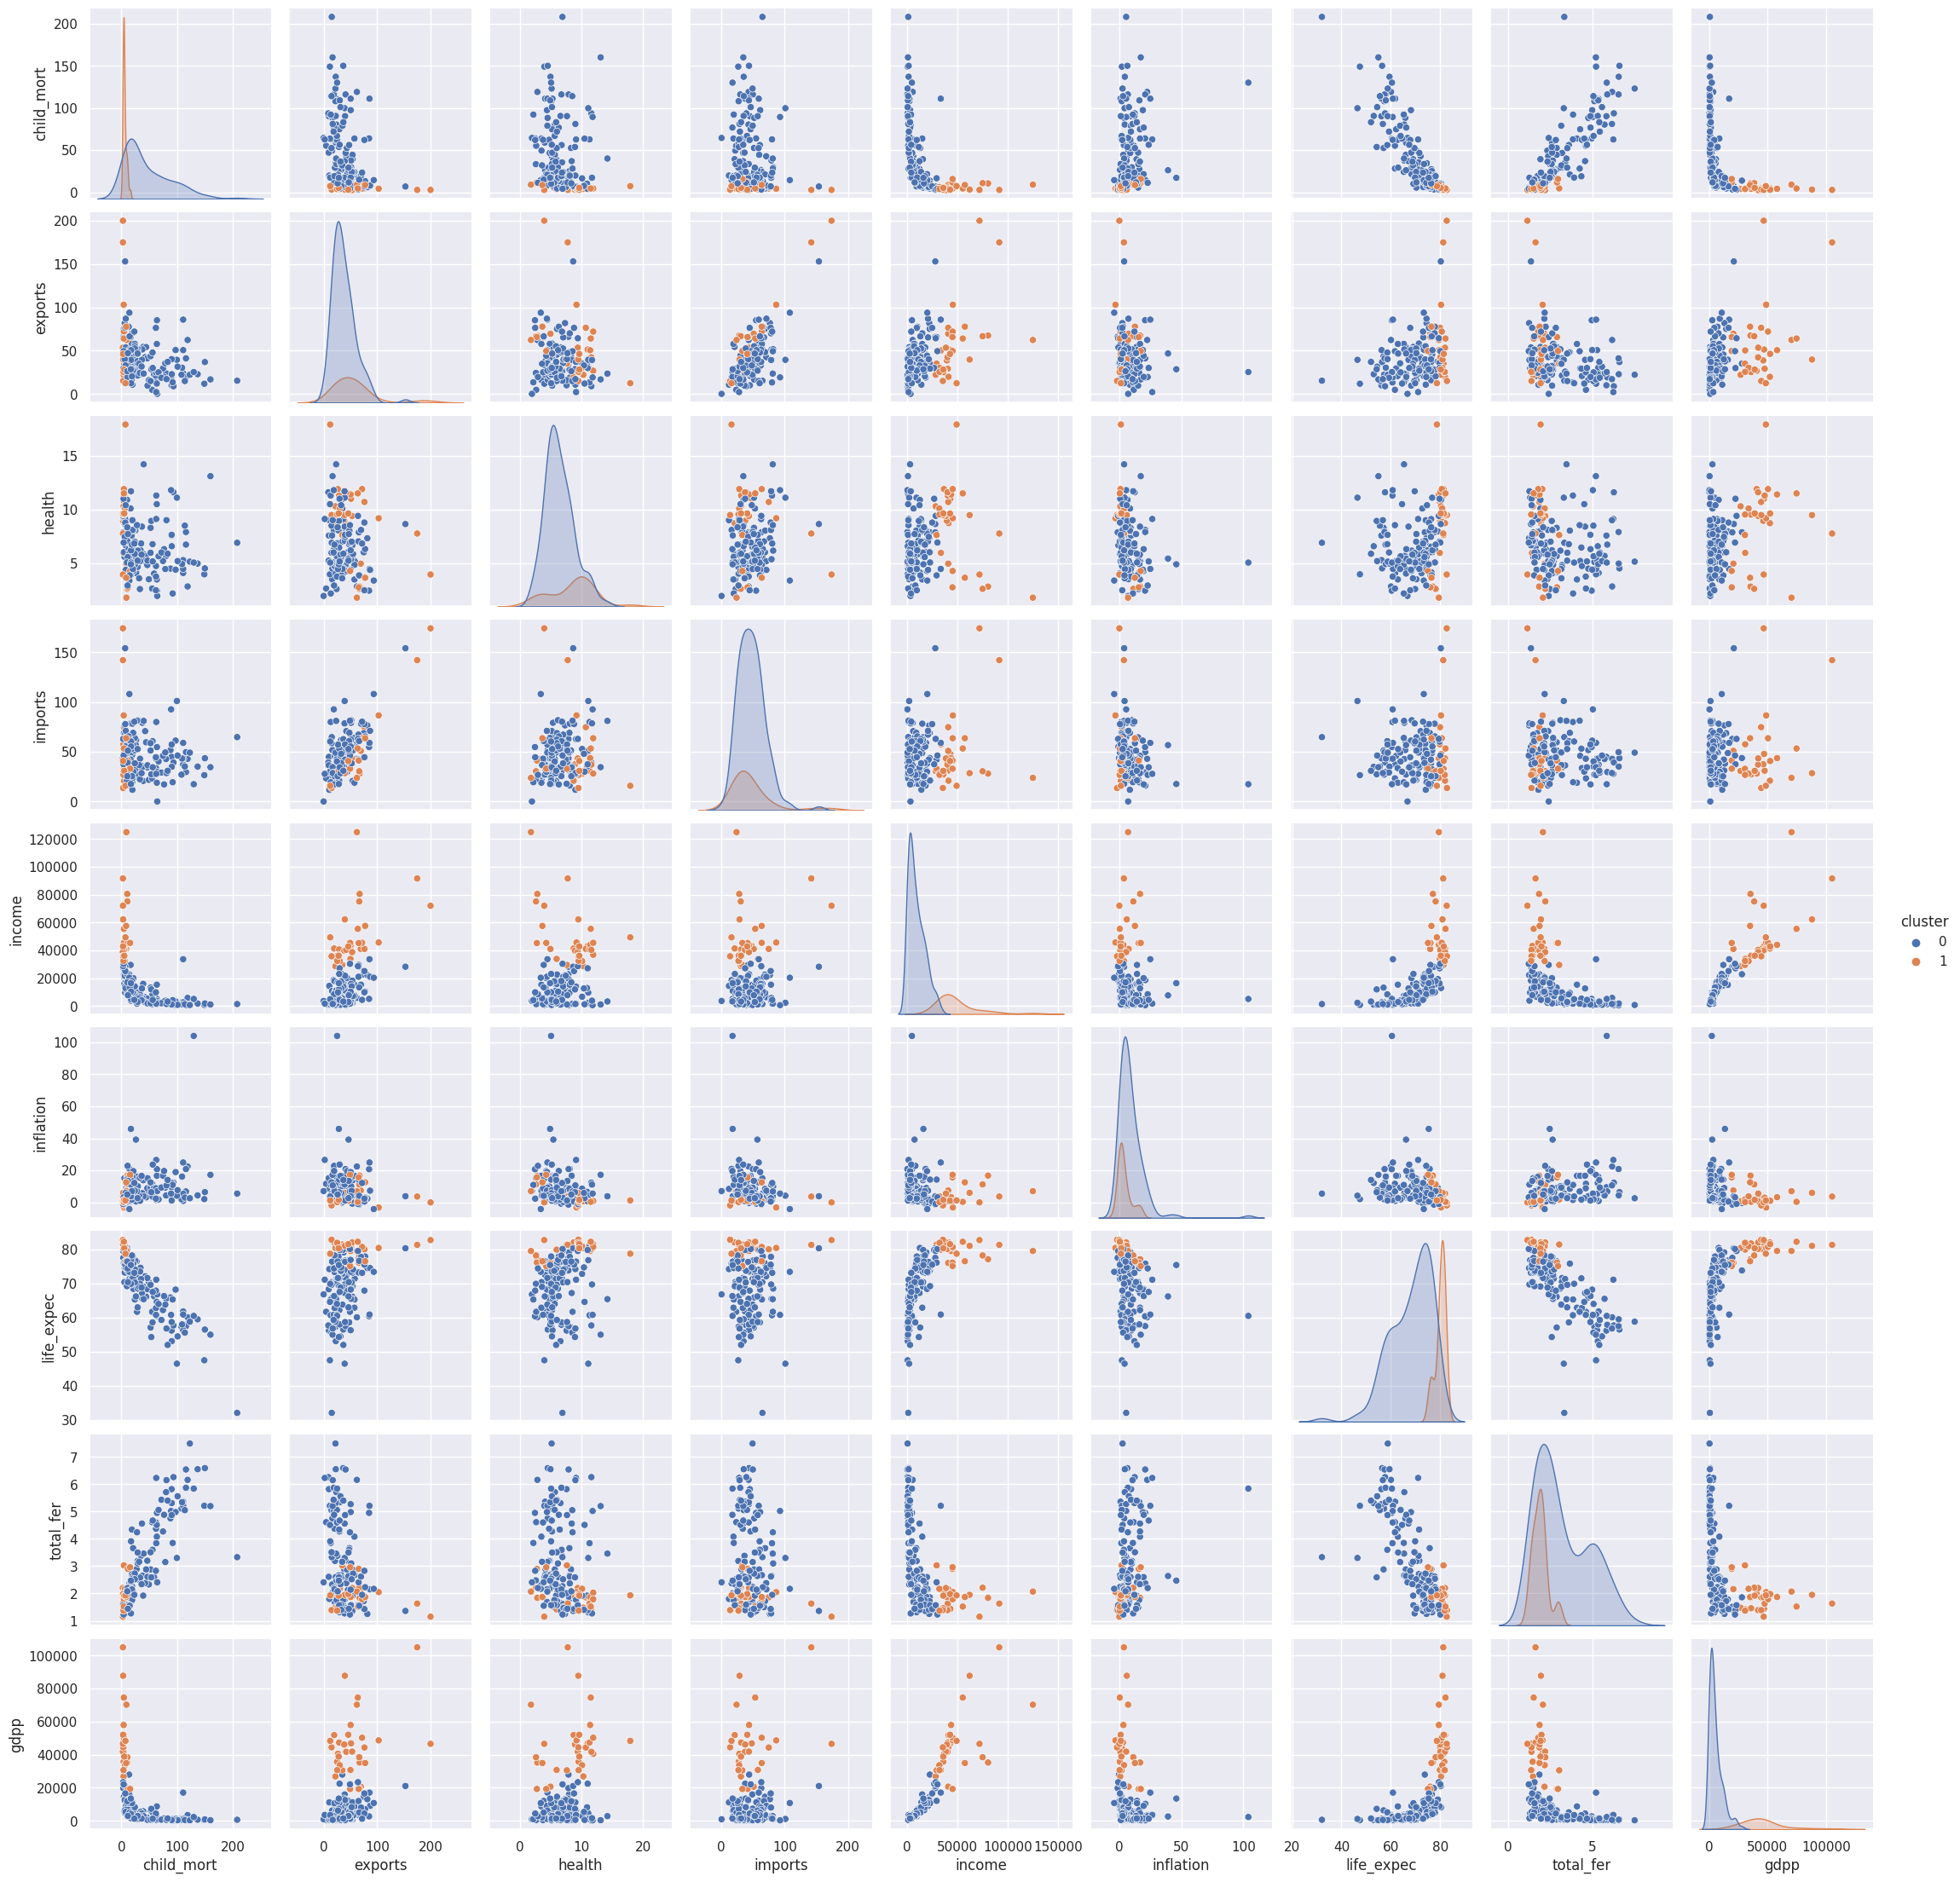

In [46]:
data = df.copy()
# Add the cluster labels to the original dataset
data['cluster'] = identified_clusters

# Visualize the clusters using pairplots or other relevant plots
sns.pairplot(data, hue='cluster', diag_kind='kde')
plt.show()

In [47]:
# Analyze the means of each cluster for different features
cluster_means = data.groupby('cluster').mean()
print(cluster_means)

         child_mort    exports    health    imports        income  inflation  \
cluster                                                                        
0         46.015556  37.586659  6.420296  46.992340   9602.688889   8.713348   
1          5.593750  55.968750  8.483750  46.459375  48962.500000   3.852000   

         life_expec  total_fer          gdpp  
cluster                                       
0         68.294074   3.198815   5348.992593  
1         80.096875   1.889687  45090.625000  


In [43]:
kmeans.cluster_centers_

array([[4.60155556e+01, 3.75866593e+01, 6.42029630e+00, 4.69923400e+01,
        9.60268889e+03, 8.71334815e+00, 6.82940741e+01, 3.19881481e+00,
        5.34899259e+03],
       [5.59375000e+00, 5.59687500e+01, 8.48375000e+00, 4.64593750e+01,
        4.89625000e+04, 3.85200000e+00, 8.00968750e+01, 1.88968750e+00,
        4.50906250e+04]])

In [44]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [45]:
print("Inertia:", kmeans.inertia_)

Inertia: 36528387934.322105
